## <font color='purple'>Assignment 8: Naive Bayes Classifier</font> <br>
Supervised Machine Learning Lab<br>
### <font color='blue'>Kaustubh Raykar
PRN : 21070126048 <br> 
<break> AIML A3 </font>

Build a Naïve Bayes
Classifier to Predict whether income exceeds $50K/yr based on census data. Also
known as "Census Income" dataset. Dataset is attached

### <font color='teal'>Importing Libraries </font>

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### <font color='teal'>Upload Dataset </font>

In [151]:
col=['Age','Worksclass','Fnlwgt','Education','Education_num','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']

df = pd.read_csv('/content/Naive bayes dataset.csv', names=col)

df.head(6)

,Age,Worksclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### <font color='teal'>Data Description </font>

In [152]:
print(df.columns)

Index(['Age', 'Worksclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')


In [153]:
df.dtypes

Age                int64
Worksclass        object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [154]:
df = df.drop(['Fnlwgt'], axis=1)

In [155]:
df.drop(['Capital_gain', 'Capital_loss', 'Hours_per_week'], axis=1, inplace=True)


In [156]:
df

,Age,Worksclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


### <font color='teal'>Data Visualisation , EDA </font> 

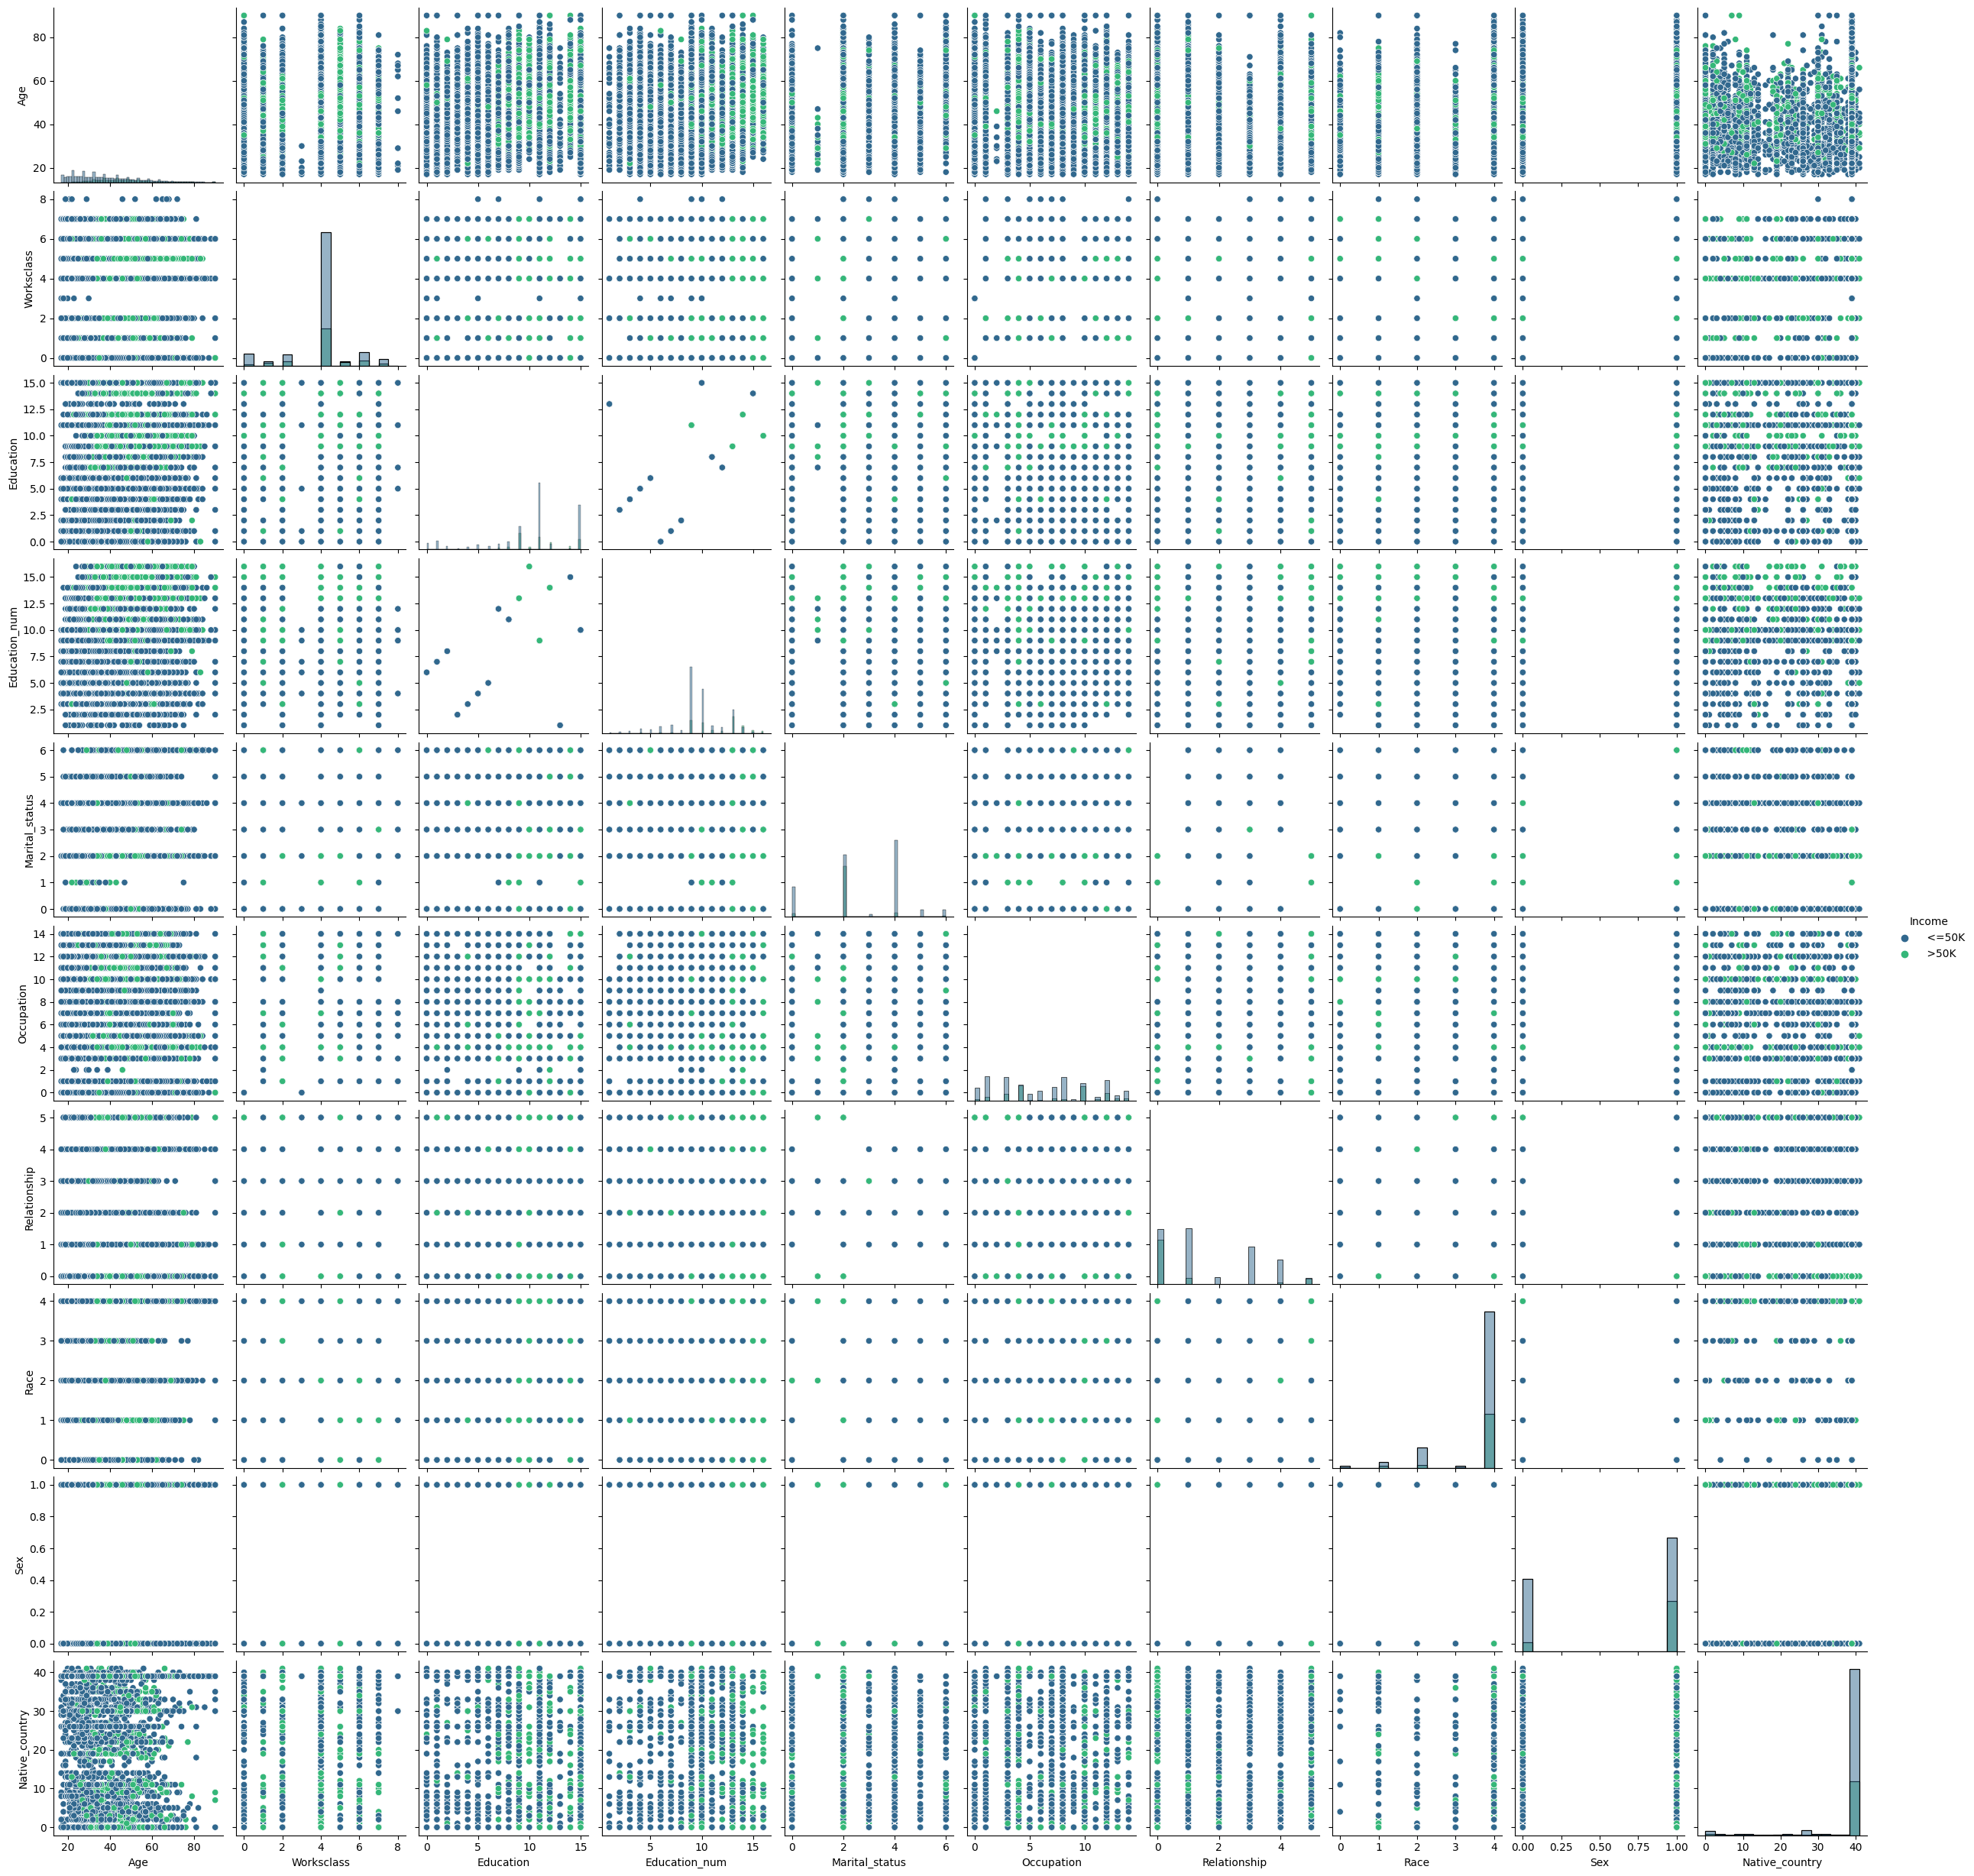

In [177]:
import seaborn as sns

cols = ['Age', 'Worksclass', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
sns.pairplot(df[cols], hue='Income', diag_kind='hist', palette='viridis')


<Axes: >

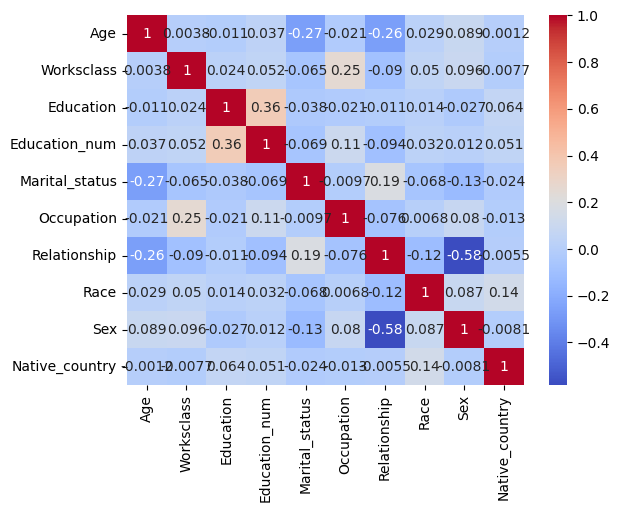

In [178]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


In [179]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="Income", color="Sex")
fig.show()


In [181]:
fig = px.histogram(df, x="Age", color="Income")
fig.show()


In [182]:
fig = px.violin(df, x="Income", y="Education_num", color="Income")
fig.show()


In [183]:
print(df['Worksclass'].unique())
print(df['Education'].unique())
print(df['Marital_status'].unique())
print(df['Occupation'].unique())
print(df['Relationship'].unique())
print(df['Race'].unique())
print(df['Sex'].unique())
print(df['Native_country'].unique())


[7 6 4 1 2 0 5 8 3]
[ 9 11  1 12  6 15  7  8  5 10 14  4  0  3 13  2]
[4 2 0 3 5 1 6]
[ 1  4  6 10  8 12  3 14  5  7 13  0 11  2  9]
[1 0 5 3 4 2]
[4 2 1 0 3]
[1 0]
[39  5 23 19  0 26 35 33 16  9  2 11 20 30 22 31  4  1 37  7 25 36 14 32
  6  8 10 13  3 24 41 29 28 34 38 12 27 40 17 21 18 15]


### <font color='teal'> Encoding columns </font>

In [184]:
# Select the categorical columns to be encoded
cat_cols = ['Worksclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
# Create an instance of LabelEncoder for each column and fit it to the data
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Print the first 5 rows of the encoded data
print(df.head())

   Age  Worksclass  Education  Education_num  Marital_status  Occupation  \
0   39           7          9             13               4           1   
1   50           6          9             13               2           4   
2   38           4         11              9               0           6   
3   53           4          1              7               2           6   
4   28           4          9             13               2          10   

   Relationship  Race  Sex  Native_country  Income  
0             1     4    1              39   <=50K  
1             0     4    1              39   <=50K  
2             1     4    1              39   <=50K  
3             0     2    1              39   <=50K  
4             5     2    0               5   <=50K  


In [185]:
for col in cat_cols:
    le = label_encoders[col]
    print(f"Column: {col}")
    for i, class_label in enumerate(le.classes_):
        print(f"Label {i}: {class_label}")
    print("\n")

Column: Worksclass
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5
Label 6: 6
Label 7: 7
Label 8: 8


Column: Education
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5
Label 6: 6
Label 7: 7
Label 8: 8
Label 9: 9
Label 10: 10
Label 11: 11
Label 12: 12
Label 13: 13
Label 14: 14
Label 15: 15


Column: Marital_status
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5
Label 6: 6


Column: Occupation
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5
Label 6: 6
Label 7: 7
Label 8: 8
Label 9: 9
Label 10: 10
Label 11: 11
Label 12: 12
Label 13: 13
Label 14: 14


Column: Relationship
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5


Column: Race
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4


Column: Sex
Label 0: 0
Label 1: 1


Column: Native_country
Label 0: 0
Label 1: 1
Label 2: 2
Label 3: 3
Label 4: 4
Label 5: 5
Label 6: 6
Label 7: 7
Label 8: 8
Label 9: 9
Label 10: 10
Label 11: 11
Label 12: 12
Label 1

In [186]:
# count the number of null values in each column
null_counts = df.isnull().sum()

# print the null counts
print(null_counts)

Age               0
Worksclass        0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native_country    0
Income            0
dtype: int64


In [187]:
df


,Age,Worksclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,39,7,9,13,4,1,1,4,1,39,<=50K
1,50,6,9,13,2,4,0,4,1,39,<=50K
2,38,4,11,9,0,6,1,4,1,39,<=50K
3,53,4,1,7,2,6,0,2,1,39,<=50K
4,28,4,9,13,2,10,5,2,0,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,39,<=50K
32557,40,4,11,9,2,7,0,4,1,39,>50K
32558,58,4,11,9,6,1,4,4,0,39,<=50K
32559,22,4,11,9,4,1,3,4,1,39,<=50K


### <font color='teal'> Splitting into x and y </font>

In [188]:
x = df.drop('Income', axis=1)
y = df['Income']


In [189]:
x

,Age,Worksclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Native_country
0,39,7,9,13,4,1,1,4,1,39
1,50,6,9,13,2,4,0,4,1,39
2,38,4,11,9,0,6,1,4,1,39
3,53,4,1,7,2,6,0,2,1,39
4,28,4,9,13,2,10,5,2,0,5
...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,39
32557,40,4,11,9,2,7,0,4,1,39
32558,58,4,11,9,6,1,4,4,0,39
32559,22,4,11,9,4,1,3,4,1,39


In [190]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32561, dtype: object

### <font color='teal'>Splitting the data into training and testing sets </font>

In [191]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [192]:
# Print the size of the train and test sets
print('Size of x_train:', x_train.shape)
print('Size of x_test:', x_test.shape)
print('Size of y_train:', y_train.shape)
print('Size of y_test:', y_test.shape)

Size of x_train: (26048, 10)
Size of x_test: (6513, 10)
Size of y_train: (26048,)
Size of y_test: (6513,)


### <font color='teal'> Import and apply Naive Bayes model   </font>

In [193]:
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB() 
classifier.fit(x_train, y_train)

GaussianNB()

In [194]:
y_pred = classifier.predict(x_test)

### <font color='teal'> Classification Results of our Model </font>

In [195]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

# Compute the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[3988  954]
 [ 469 1102]]

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85      4942
        >50K       0.54      0.70      0.61      1571

    accuracy                           0.78      6513
   macro avg       0.72      0.75      0.73      6513
weighted avg       0.81      0.78      0.79      6513



In [196]:
# Format the output of ac and cm
output = 'The accuracy is {:.2f}%\n\nThe confusion matrix is:\n{}'
output = output.format(ac*100, cm)

# Print the output
print(output)

The accuracy is 78.15%

The confusion matrix is:
[[3988  954]
 [ 469 1102]]


### <font color='teal'> Confusion Matrix graph </font>

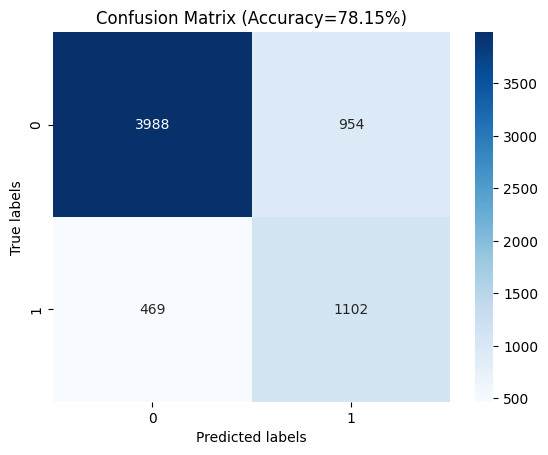

In [197]:
import seaborn as sns

# Calculate the confusion matrix and accuracy score
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Accuracy={:.2f}%)'.format(ac*100))

# Show the plot
plt.show()


### <font color='teal'> Thank you  </font>